In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Read in the data

df = pd.read_csv("data/chicago_crime_2019_2023.csv")

In [3]:
df.info()

# Clean data
df_cl = df.drop_duplicates()
df_cl = df_cl.dropna()

df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120322 entries, 0 to 1120321
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   unique_key      1120322 non-null  int64  
 1   date            1120322 non-null  object 
 2   block           1120322 non-null  object 
 3   primary_type    1120322 non-null  object 
 4   description     1120322 non-null  object 
 5   ward            1120274 non-null  float64
 6   community_area  1120320 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 59.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1120273 entries, 0 to 1120321
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   unique_key      1120273 non-null  int64  
 1   date            1120273 non-null  object 
 2   block           1120273 non-null  object 
 3   primary_type    1120273 non-null  object 
 4   descript

In [4]:
# list all primary crime types
crime_types = df_cl.primary_type.unique()

In [5]:
df_cl.sample(10)

,unique_key,date,block,primary_type,description,ward,community_area
210609,11699477,2019-05-24 11:05:00 UTC,075XX S STONY ISLAND AVE,THEFT,OVER $500,8.0,43.0
703284,11557407,2019-01-05 02:20:00 UTC,0000X W LAKE ST,THEFT,FROM BUILDING,42.0,32.0
368952,12155993,2020-09-04 10:15:00 UTC,079XX S HERMITAGE AVE,THEFT,$500 AND UNDER,17.0,71.0
625096,13174157,2023-08-13 12:01:00 UTC,081XX S DREXEL AVE,CRIMINAL DAMAGE,TO VEHICLE,8.0,44.0
96956,11844988,2019-09-29 07:36:00 UTC,006XX N WABASH AVE,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,42.0,8.0
359934,13058604,2023-04-30 03:00:00 UTC,034XX N CICERO AVE,THEFT,$500 AND UNDER,31.0,15.0
532847,12021454,2020-03-31 08:46:00 UTC,073XX N RIDGE BLVD,ASSAULT,SIMPLE,49.0,1.0
175671,11740387,2019-06-29 09:21:00 UTC,014XX W FLOURNOY ST,CRIMINAL TRESPASS,TO LAND,28.0,28.0
1069099,12452664,2021-06-08 02:23:00 UTC,022XX W CULLERTON ST,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,25.0,31.0
638296,12973662,2023-02-05 01:52:00 UTC,060XX W FULLERTON AVE,CRIMINAL TRESPASS,TO VEHICLE,30.0,19.0


In [6]:
# Convert timestamp to date 
df_cl["date"] = pd.to_datetime(df_cl["date"])
# insert year
df_cl["year"] =  df_cl.date.dt.year

In [7]:
# df_cl_year = df_cl.groupby(["year", "primary_type"])
# df_crime_counts = df_cl_year.agg(count=("primary_type", "count")).unstack(fill_value=0)
df_crime_counts = pd.crosstab(df_cl.year,df_cl.primary_type)
df_crime_counts.sample(5)

primary_type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
year,,,,,,,,,,,,,,,,,,,,,
2022,422,20800,40921,7594,176,0,27240,1562,4224,16481,...,14568,283,5,711,0,8964,1220,447,54832,8774
2019,376,20618,49514,9638,217,908,26681,751,6819,19060,...,16794,681,11,1520,0,7995,1370,227,62490,6338
2020,588,18252,41510,8758,148,75,24876,1167,4176,18328,...,12592,277,9,1271,1,7855,963,203,41323,8432
2021,529,20343,40459,6659,169,0,25093,1500,3406,17466,...,13945,95,4,603,0,7917,1095,370,40802,8980
2023,388,17377,34043,5593,158,0,23043,1222,3582,12326,...,11788,194,3,661,0,8079,1032,387,42900,6860


In [8]:
df_top_three = pd.DataFrame(df_crime_counts[["THEFT", "BATTERY", "CRIMINAL DAMAGE"]])

# Merge criminal sexual assault and crim sexual assult categories
df_crime_counts["CRIMINAL SEXUAL ASSAULT"] = df_crime_counts["CRIM SEXUAL ASSAULT"] + df_crime_counts["CRIMINAL SEXUAL ASSAULT"]
df_crime_counts.drop(columns = "CRIM SEXUAL ASSAULT", inplace = True)
# update crime types list
crime_types = df_crime_counts.columns

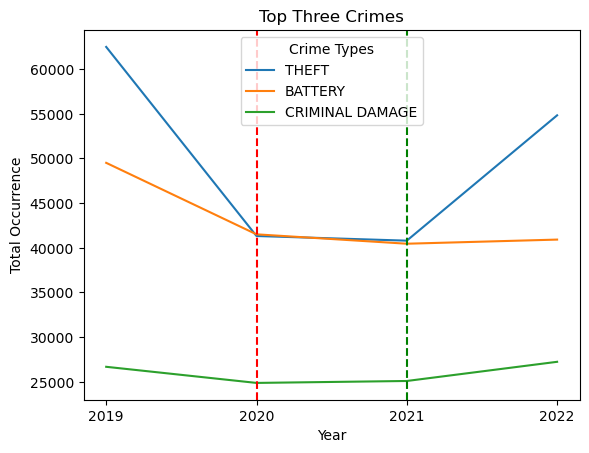

In [75]:
df_top_three_pandemic = df_top_three.loc[2019:2022]
plot = df_top_three_pandemic.plot(xticks = range(2019,2023), 
                                  xlabel = "Year", 
                                  ylabel = "Total Occurrence",
                                  title = "Top Three Crimes")
plot.axvline(2020, color = "red", linestyle = "dashed")
plot.axvline(2021, color = "green", linestyle = "dashed")
plot = plot.legend(title='Crime Types')



In [10]:
years = [2020, 2021, 2022]
rows = []

for type in crime_types:
    change = df_crime_counts[type].pct_change(periods=1) * 100 
    row = []
    for year in years:
        row.append(round(change.loc[year], 2))
    rows.append(row)
 

In [11]:
change_df = pd.DataFrame(rows, index = crime_types, columns = years)

In [12]:
change_df

,2020,2021,2022
primary_type,,,
ARSON,56.38,-10.03,-20.23
ASSAULT,-11.48,11.46,2.25
BATTERY,-16.17,-2.53,1.14
BURGLARY,-9.13,-23.97,14.04
CONCEALED CARRY LICENSE VIOLATION,-31.80,14.19,4.14
CRIMINAL DAMAGE,-6.77,0.87,8.56
CRIMINAL SEXUAL ASSAULT,-25.14,20.77,4.13
CRIMINAL TRESPASS,-38.76,-18.44,24.02
DECEPTIVE PRACTICE,-3.84,-4.70,-5.64


In [25]:
#clean up
change_df.dropna(inplace=True)
# get the crime categories with the highest increase in 2020
change_df.sort_values(2020, inplace=True, ascending = False)
major_increased_2020_df = change_df.head(3)

In [44]:
# Build a plot showing how those three catagories changed through the pandemic
major_increased_2020_df

,2020,2021,2022
primary_type,,,
HOMICIDE,56.69,1.76,-10.37
ARSON,56.38,-10.03,-20.23
WEAPONS VIOLATION,33.04,6.50,-2.29


In [65]:
major_increased_2020_df = major_increased_2020_df.transpose()

primary_type,HOMICIDE,ARSON,WEAPONS VIOLATION
2020,56.69,56.38,33.04
2021,1.76,-10.03,6.50
2022,-10.37,-20.23,-2.29


In [79]:
top_three_increase_2020 = major_increased_2020_df.columns
top_three_incr_2020_df = df_crime_counts[top_three_increase_2020]
top_three_incr_2020_df

primary_type,HOMICIDE,ARSON,WEAPONS VIOLATION
year,,,
2019,508,376,6338
2020,796,588,8432
2021,810,529,8980
2022,726,422,8774
2023,482,388,6860


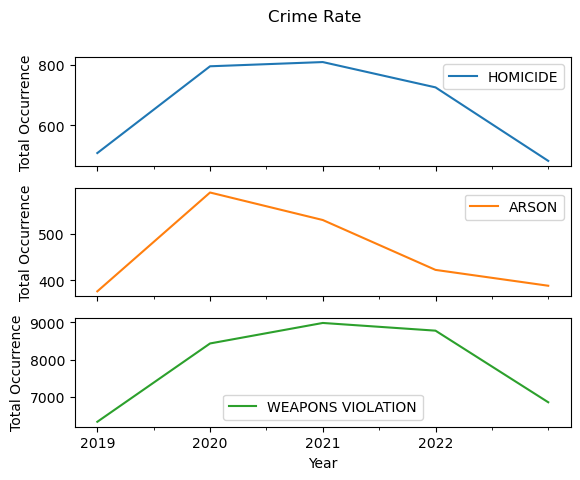

In [82]:
plot = top_three_incr_2020_df.plot(xticks = range(2019,2023), 
                                   subplots=True,
                                   xlabel = "Year", 
                                   ylabel = "Total Occurrence", 
                                   title = "Crime Rate")


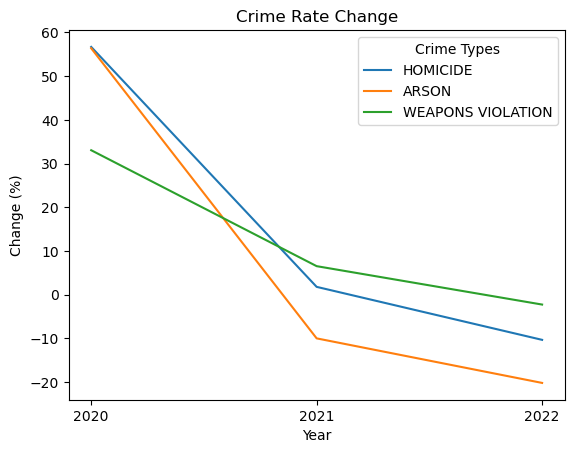

In [71]:
plot = major_increased_2020_df.plot(xticks = range(2020,2023), 
                             xlabel = "Year", 
                             ylabel = "Change (%)", 
                             title = "Crime Rate Change")
plot = plot.legend(title='Crime Types')

In [16]:

change_df.sort_values(2021, inplace=True, ascending = False)
change_df.head(10)[2021]

primary_type
NON-CRIMINAL                         300.00
STALKING                              82.27
HUMAN TRAFFICKING                     80.00
LIQUOR LAW VIOLATION                  28.67
CRIMINAL SEXUAL ASSAULT               20.77
CONCEALED CARRY LICENSE VIOLATION     14.19
SEX OFFENSE                           13.71
ASSAULT                               11.46
OTHER OFFENSE                         10.74
WEAPONS VIOLATION                      6.50
Name: 2021, dtype: float64

In [17]:
change_df.sort_values(2022, inplace=True, ascending = False)
change_df.head(10)[2022]

primary_type
OTHER NARCOTIC VIOLATION            250.00
PROSTITUTION                        197.89
MOTOR VEHICLE THEFT                 102.26
HUMAN TRAFFICKING                    88.89
INTIMIDATION                         49.59
KIDNAPPING                           34.48
THEFT                                34.39
INTERFERENCE WITH PUBLIC OFFICER     25.16
PUBLIC INDECENCY                     25.00
NON-CRIMINAL                         25.00
Name: 2022, dtype: float64